# Thesis Wordcloud

*By Shivan Sivakumaran; started Monday 2nd November 2020*

Inspired by my friend's completion of the thesis-portion of their PhD, this simple project celebrates their difficult slog over the numerous years (I think four?). We will be generating a wordcloud of their thesis... well not their thesis because we have to protect their privacy, but we are going to use something similiar.

But firstly, you might be asking what is a wordcloud?

A wordcloud is a visual representation of textual data. Put simply, imagine a picture of words, the greater frequency of words present in a given text, the larger it will appear.

What will we be using?

A tour of our tool belt will include:

- [Python 3.8](https://www.python.org/), of course
- [Jupyterlab](https://jupyter.org/)

We are going to use two main libraries:

- [spaCy](https://spacy.io/) - for tokenisation of words (this will make sense when we start playing around with the words)
- [wordcloud](https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html) - aptly named

And here are some other libraries just to help out:
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [re](https://docs.python.org/3/library/re.html)

Let's get started.

### Installing the non-standard libraries

Before we can continue we need to install the extra libraries that are not standard with Python and even Anaconda/Miniconda.

First let's install `spaCy`, which requires a bit more effort to install than your standard python package.

On their [own webpage, they have excellent documentation](https://spacy.io/usage) on how to install their package.

I'm using conda along with Jupyterlab in mu own environment. The following commands when entered into the Jupyterlab terminal install `spaCy`.

```shell
conda install -c conda-forge spacy
conda install -c conda-forge spacy-lookups-data
python -m spacy download en_core_web_sm
```

Next is installing `wordcloud`, which is a lot easier.

```shell
conda install -c conda-forge wordcloud
```

`wordcloud` has some dependancies, which can be installed:

```shell
conda install -c conda-forge pillow
conda install -c conda-forge numpy
```
There we have it. We should all be set up to go.

### Importing the Libraries

Let's start coding.

In [1]:
# importing and setting up libraries
import random as r
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})

from wordcloud import WordCloud, STOPWORDS

import spacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm") # setting up for the English language

## Opening up the File

Earlier we talking about my friend's thesis, we are going to use what I wrote instead. It is a fantastic masterpiece on [glaucoma](https://shivansivakumaran.com/glaucoma/). I wrote it on google docs. So the first thing I go is save the essay as text file (`.txt`). Saving it as a text file, this will make manipulating with Python at lot easier without employing another library.

Let's open up the file and have a look at some chracters of the text file.

In [2]:
file = 'shivanglaucomaessay.txt'

with open(file, 'r') as f:
    text = f.read()
    
text[1000:1500]

't is important to identify the type of glaucoma to offer appropriate treatment.\nMechanism of Glaucoma\nIntraocular pressure (IOP) has an important role in glaucoma. To understand its mechanism of action, it is very important to look at aqueous humor production and drainage (Kass, 2005). Aqueous humour is primarily produced by active secretion at the ciliary processes of the ciliary body, mediated by aquaporins and carbonic anhydrase; the prior requiring energy and the latter requiring enzymatic a'

In [3]:
len(text)

37519

You can see here it is only a measly 37519 chracters. I could not imagine how many a thesis would have!

## Tokenisation

In order to count all the words we need to take my essay and turn it into 'tokens'. We are going to use this using [spaCy](https://spacy.io/).

`spaCy` is mainly used for [Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) (NLP). NLP is a computers way of understanding text. 

You can do a lot with `spaCy`, but for the purpose of this project we are going to be parsing the text in this essay.

In [4]:
doc = nlp(text)

tokens = [token for token in doc]

r.seed(42) # ensure we get the same random selection everytime this is executed

rand_select = r.choices(tokens, k=50)
rand_select

[PACG,
 Once,
 field,
 (,
 ,
 required,
 cyclophotocoagulation,
 ,,
 glaucoma,
 important,
 Kass,
 underlying,
 to,
 2017,
 gold,
 iris,
 of,
 .,
 (,
 a,
 Current,
 and,
 of,
 indicates,
 .,
 visual,
 loss,
 early,
 Silva,
 resulting,
 of,
 Vision,
 .,
 ,,
 ,,
 and,
 2007,
 treatment,
 of,
 adverse,
 beta,
 angle,
 to,
 times,
 loss,
 although,
 detectable,
 important,
 dynamics,
 on]

## Cleaning up

You might notice some problems here:

* The cases are all different in the words. Python will look at 'Size' and 'size' as different words when we want them to be the same.
* We have punctuation included as tokens and this is not important to us
* We have '\n' or newline characters that need to be removed
* We have stop words like 'the', 'a', 'an', etc. which are not interesting words but occur a lot and will drown out the words that we care about
* Finally, this may be hard to tell with such a small selection of words here, but plurals and different

Let's fix this by first making the text lowercase.

In [5]:
lower = [_.text.lower() for _ in rand_select]
lower

['pacg',
 'once',
 'field',
 '(',
 '\n',
 'required',
 'cyclophotocoagulation',
 ',',
 'glaucoma',
 'important',
 'kass',
 'underlying',
 'to',
 '2017',
 'gold',
 'iris',
 'of',
 '.',
 '(',
 'a',
 'current',
 'and',
 'of',
 'indicates',
 '.',
 'visual',
 'loss',
 'early',
 'silva',
 'resulting',
 'of',
 'vision',
 '.',
 ',',
 ',',
 'and',
 '2007',
 'treatment',
 'of',
 'adverse',
 'beta',
 'angle',
 'to',
 'times',
 'loss',
 'although',
 'detectable',
 'important',
 'dynamics',
 'on']

All lower case now. Now let's go back to our random selection again and remove the puncuation.

In [6]:
nopunc = [_.text for _ in rand_select if _.pos_ != 'PUNCT']
nopunc

['PACG',
 'Once',
 'field',
 '\n',
 'required',
 'cyclophotocoagulation',
 'glaucoma',
 'important',
 'Kass',
 'underlying',
 'to',
 '2017',
 'gold',
 'iris',
 'of',
 'a',
 'Current',
 'and',
 'of',
 'indicates',
 'visual',
 'loss',
 'early',
 'Silva',
 'resulting',
 'of',
 'Vision',
 'and',
 '2007',
 'treatment',
 'of',
 'adverse',
 'beta',
 'angle',
 'to',
 'times',
 'loss',
 'although',
 'detectable',
 'important',
 'dynamics',
 'on']

Now, let's remove the '\n' or newline characters. You might have not seen this, but some are bunched together liks this '/n/n/n/n' in one string. So we need to some up of removing these.

In [7]:
nonewline = [_.text for _ in rand_select if not '\n' in _.text]
nonewline

['PACG',
 'Once',
 'field',
 '(',
 'required',
 'cyclophotocoagulation',
 ',',
 'glaucoma',
 'important',
 'Kass',
 'underlying',
 'to',
 '2017',
 'gold',
 'iris',
 'of',
 '.',
 '(',
 'a',
 'Current',
 'and',
 'of',
 'indicates',
 '.',
 'visual',
 'loss',
 'early',
 'Silva',
 'resulting',
 'of',
 'Vision',
 '.',
 ',',
 ',',
 'and',
 '2007',
 'treatment',
 'of',
 'adverse',
 'beta',
 'angle',
 'to',
 'times',
 'loss',
 'although',
 'detectable',
 'important',
 'dynamics',
 'on']

Now that we have some up with a way of removing newline characters, next we are going to remove stopwords like 'a', 'an', 'the' etc.

In [8]:
nostopwords = [_.text for _ in rand_select if not _.is_stop]
nostopwords

['PACG',
 'field',
 '(',
 '\n',
 'required',
 'cyclophotocoagulation',
 ',',
 'glaucoma',
 'important',
 'Kass',
 'underlying',
 '2017',
 'gold',
 'iris',
 '.',
 '(',
 'Current',
 'indicates',
 '.',
 'visual',
 'loss',
 'early',
 'Silva',
 'resulting',
 'Vision',
 '.',
 ',',
 ',',
 '2007',
 'treatment',
 'adverse',
 'beta',
 'angle',
 'times',
 'loss',
 'detectable',
 'important',
 'dynamics']

We have removed the uninteresting stopwords.

Next is to combine inflected words using [lemmatisation](https://en.wikipedia.org/wiki/Lemmatisation).

In [9]:
lemmas = [str(_.lemma_) for _ in rand_select]
lemmas

['PACG',
 'once',
 'field',
 '(',
 '\n',
 'require',
 'cyclophotocoagulation',
 ',',
 'glaucoma',
 'important',
 'Kass',
 'underlying',
 'to',
 '2017',
 'gold',
 'iris',
 'of',
 '.',
 '(',
 'a',
 'current',
 'and',
 'of',
 'indicate',
 '.',
 'visual',
 'loss',
 'early',
 'Silva',
 'result',
 'of',
 'Vision',
 '.',
 ',',
 ',',
 'and',
 '2007',
 'treatment',
 'of',
 'adverse',
 'beta',
 'angle',
 'to',
 'time',
 'loss',
 'although',
 'detectable',
 'important',
 'dynamic',
 'on']

The effect on lemmatisation is difficult to see since we have a small selection of words.

In the previous examples, we have done all these manipulations individually. We can actually do this all at once.

In [10]:
cleaned_doc = [_.lemma_.lower() for _ in doc if _.pos_ != 'PUNCT' 
                                            and '\n' not in _.text 
                                            and not _.is_stop]
r.seed(43)

r.choices(cleaned_doc, k=20)

['ultrafiltration',
 'science',
 '2007',
 'tham',
 'line',
 '223',
 'use',
 'important',
 'factor',
 'sign',
 'speak',
 '2015',
 '2016',
 'value',
 'optic',
 'able',
 'murthy',
 '22',
 'medication',
 'act']

### Fun Statistics

Now the document has been cleaned to the best of our ability. There will always be slight imperfections but I think we have dealt with the majority.

Let's put this into a `pandas` dataframe so we can make some fun plots. We can also gets some statistics, which are self-explanatory.

In [11]:
words = pd.DataFrame(cleaned_doc, columns=['words'])
words.head()

,words
0,﻿aco
1,id
2,109229
3,glaucoma
4,overview


In [12]:
words.describe()

,words
count,3549
unique,1283
top,glaucoma
freq,118


In [13]:
words.value_counts().head(30) # gives the first 30 results

words        
glaucoma         118
iop               66
treatment         40
angle             40
important         35
risk              31
-                 28
visual            27
aqueous           26
/                 26
cause             25
humour            25
&                 24
field             23
result            23
reduce            23
m.                22
increase          22
ophthalmology     22
patient           21
nerve             20
damage            20
2016              20
optic             19
loss              19
example           19
disease           18
j.                17
a.                17
laser             17
dtype: int64

I'm still not happy with word exclusion that we came up with before. We are still getting a number of '-', '/', '&' and letters ending with a period (such as 'm.').

These are not useful to us, so let's do some further elimination.

We are going to create list of characters that we want to excluded `['-', '/', '&']`. And we are also going to use [regular expression](https://www.w3schools.com/python/python_regex.asp) (the `re` module) to eliminate the letter plus period. 

In [14]:
exclude_char = ['-', '/', '&']

cleaned_doc_again = [_.lemma_.lower() for _ in doc if _.pos_ != 'PUNCT' 
                                            and '\n' not in _.text 
                                            and not _.is_stop
                                            and _.text not in exclude_char
                                            and not bool(re.search(r'^\w\.$', _.text))]

words_cleaned = pd.DataFrame(cleaned_doc_again, columns=['words'])
words_cleaned.value_counts().head(30)

words         
glaucoma          118
iop                66
angle              40
treatment          40
important          35
risk               31
visual             27
aqueous            26
humour             25
cause              25
result             23
field              23
reduce             23
ophthalmology      22
increase           22
patient            21
nerve              20
damage             20
2016               20
loss               19
optic              19
example            19
disease            18
laser              17
involve            17
open               16
surgery            16
factor             14
develop            13
trabeculectomy     13
dtype: int64

This is much better and I think I'm a lot more satified with the result.

Now, we can then plot this onto a graph to visualise the data.

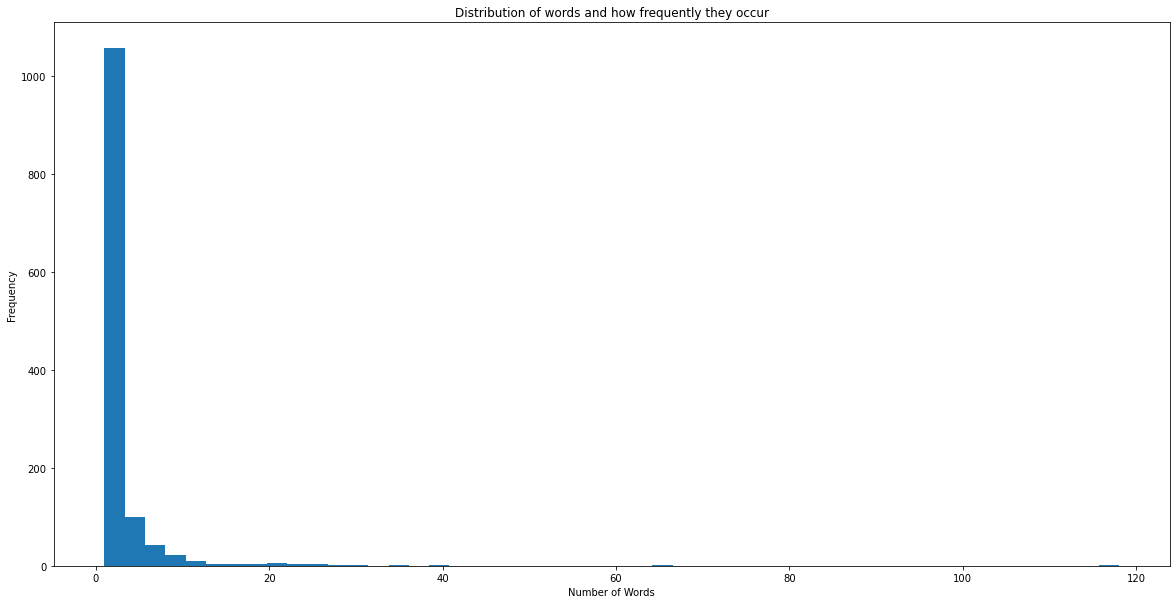

In [15]:
x = words_cleaned.value_counts()

fig = plt.figure(figsize=(20,10))
graph = plt.hist(x, bins=50)
ylab = plt.ylabel('Frequency')
xlab = plt.xlabel('Number of Words')

title = plt.title('Distribution of words and how frequently they occur')

This graphs tells us that the majority of words occur infrequently as we expect, which a few outliers. Let's build a bar chart with each of the words to compare then against each other.

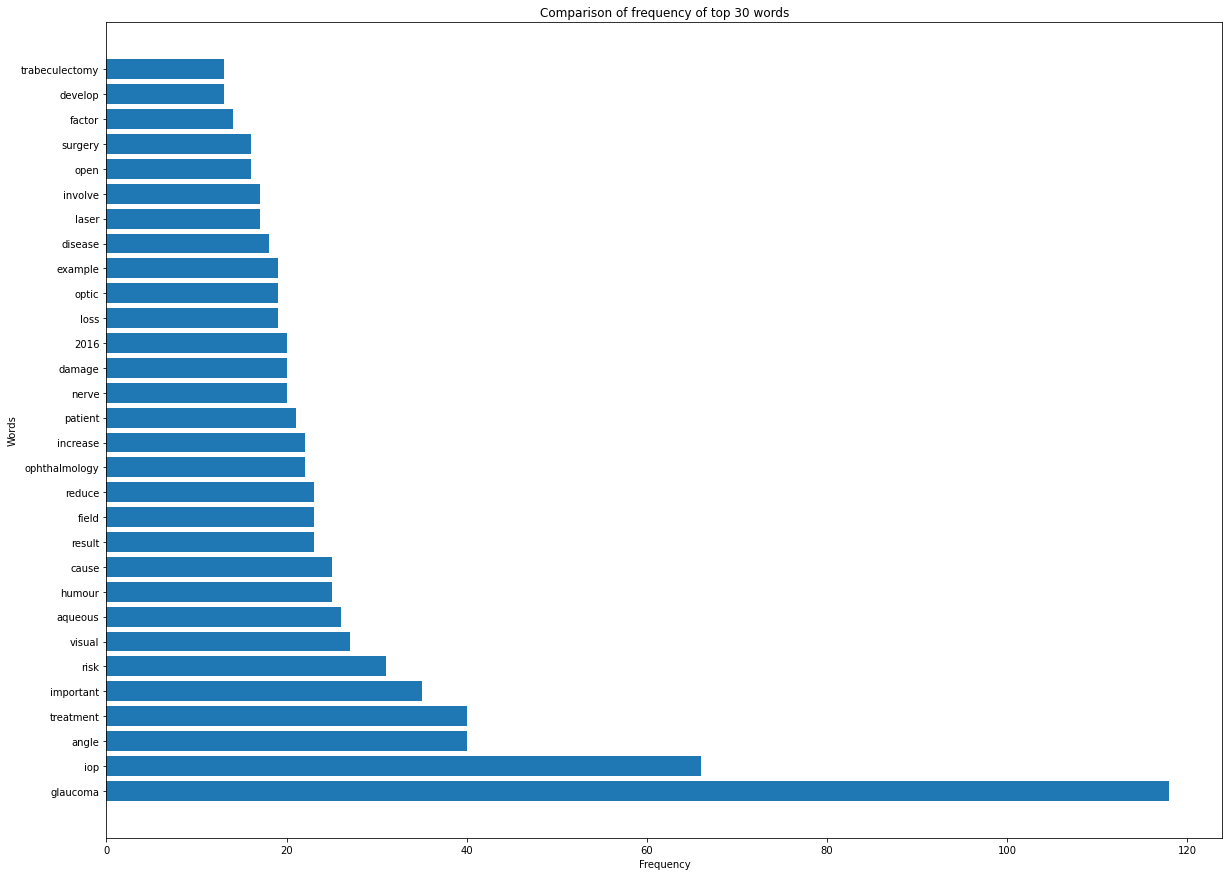

In [16]:
x_30 = words_cleaned.value_counts().head(30)

fig = plt.figure(figsize=(20,15))
graph = plt.barh([i[0] for i in x_30.index], x_30.values)
ylab = plt.ylabel('Words')
xlab = plt.xlabel('Frequency')

title = plt.title('Comparison of frequency of top 30 words')

## The Wordcloud

Finally we have our clean list that we can manufacture into a wordcloud!

This uses the special module, `wordcloud` and elements of `matplotlib` to produce this.words_cleaned

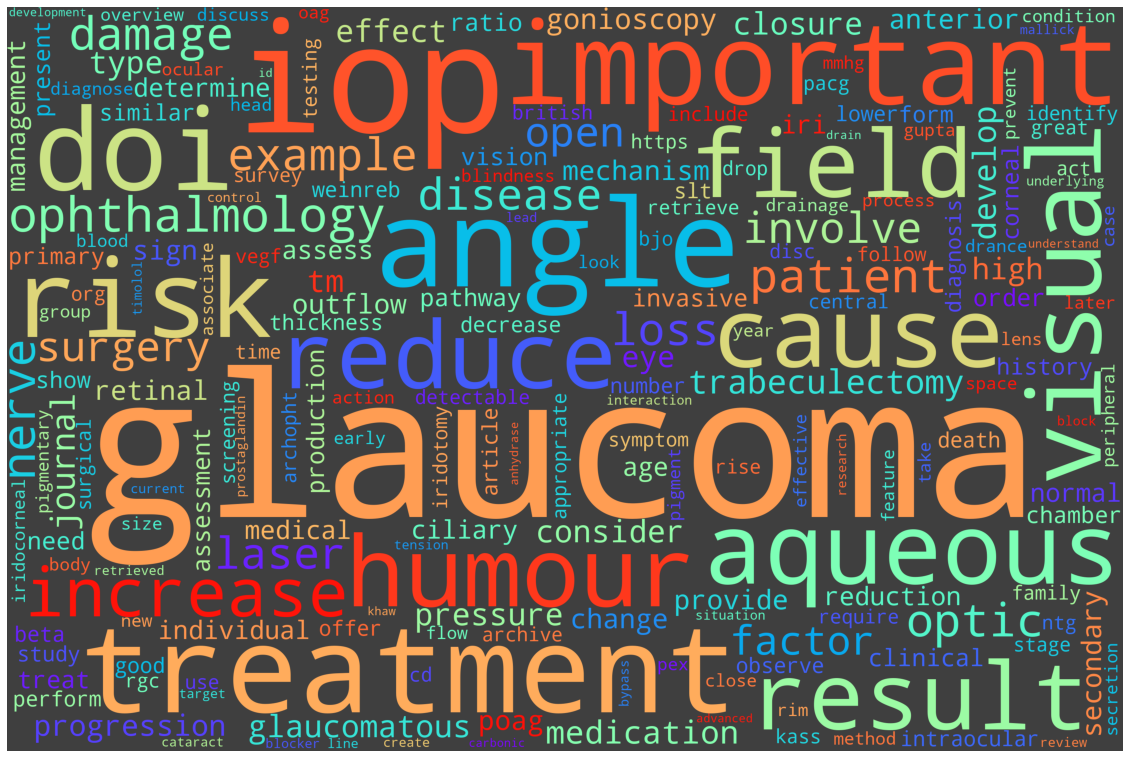

In [17]:
wordcloud = WordCloud(width = 3000, height = 2000,
                        random_state=1, background_color='#3F3F3F',
                        colormap='rainbow', collocations=False).generate(' '.join(cleaned_doc_again))

fig = plt.figure(figsize=(20, 15))
imshow = plt.imshow(wordcloud)
axis = plt.axis('off')

And there we have it. A wordcloud of my glaucoma essay.

We can take this a step further and make this into a seperate python file called `ThesisWC.py` and pass it through as a function. [Here is the code](https://github.com/ShivanS93/ThesisWordcloud/blob/master/ThesisWC.py).

I've downloaded a blog I wrote about blue light protection and we can pass this through the function I have created to perform the same result.

Text Length (char):  19931


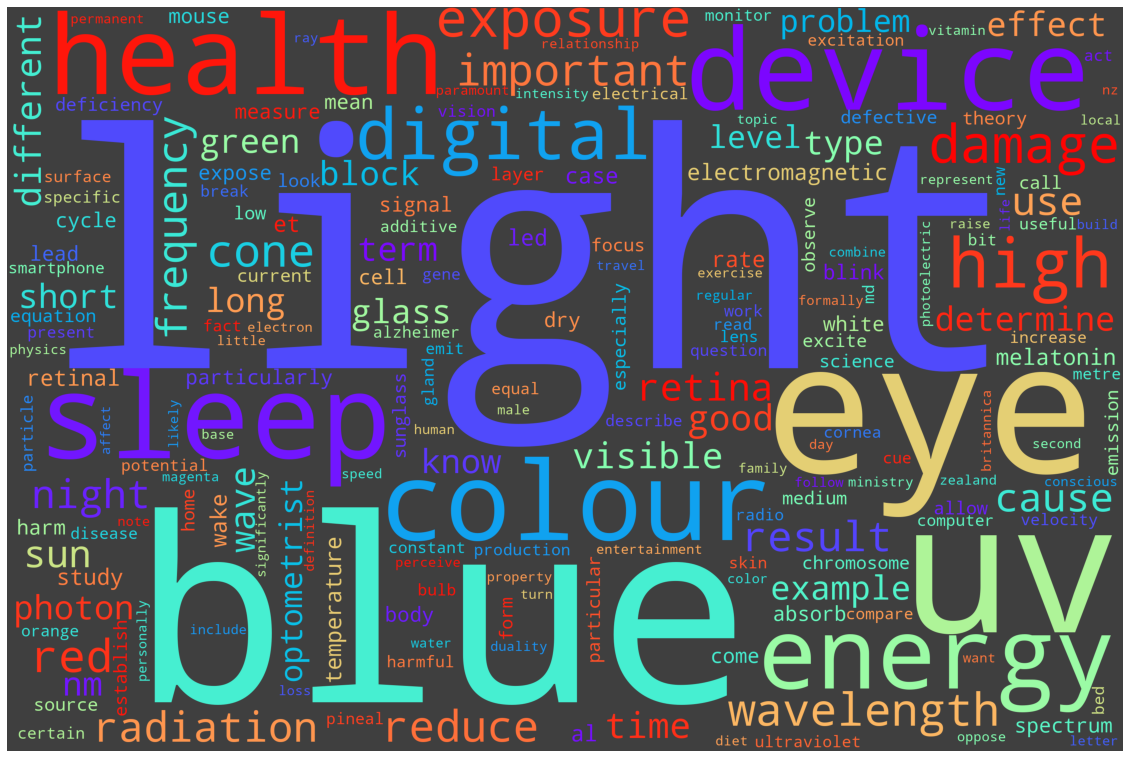

In [18]:
import ThesisWC

ThesisWC.ThesisWC('shivanbluelightblog.txt')

## Conclusion

I hope you have found this fun and useful. Please let me know if there is any feedback. It would be greatly appreciated.